In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print(tf.__version__)

2.19.0


In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

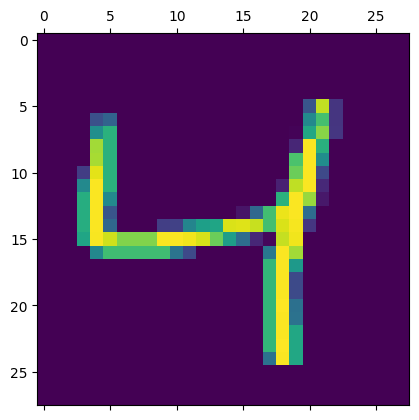

In [3]:
plt.matshow(X_train[2])

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [7]:
X_train_flat.shape

(60000, 784)

In [8]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat, y_train, epochs=5)

c:\Users\User\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8139 - loss: 0.7084
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9131 - loss: 0.3145
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9197 - loss: 0.2824
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9200 - loss: 0.2796
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.9260 - loss: 0.2653


In [10]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9122 - loss: 0.3072


[0.2700059115886688, 0.9247999787330627]

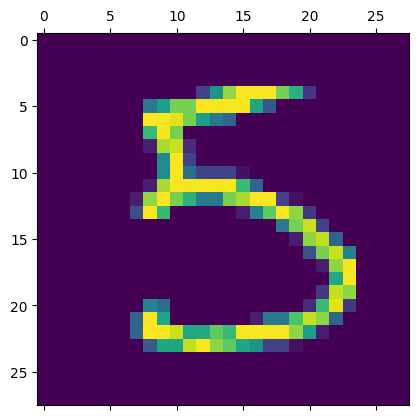

In [11]:
plt.matshow(X_test[15])

In [12]:
y_predict = model.predict(X_test_flat)
np.argmax(y_predict[15])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step


np.int64(5)

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,552 (92.00 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,702 (61.34 KB)

In [14]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [15]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [16]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)

Text(95.72222222222221, 0.5, 'Truth Values')

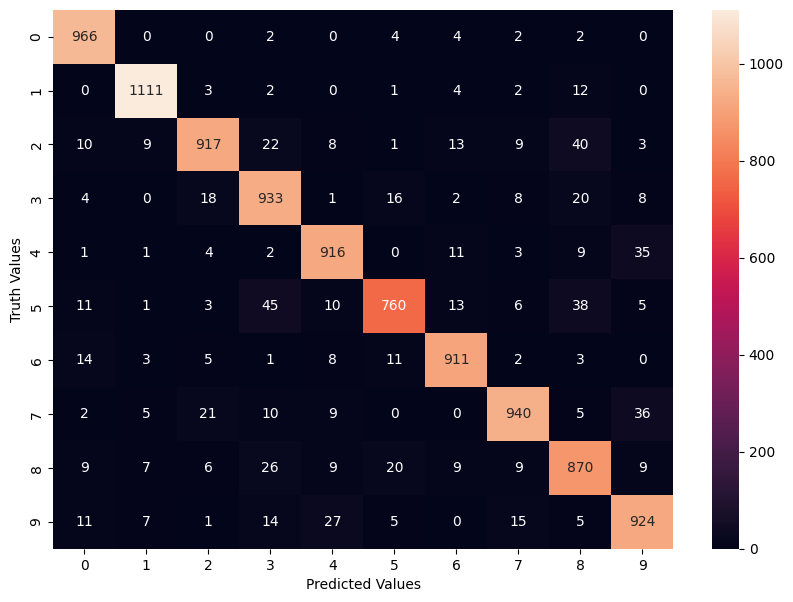

In [17]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Truth Values')

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat, y_train, epochs=5)

c:\Users\User\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8702 - loss: 0.4630
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9607 - loss: 0.1323
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9741 - loss: 0.0877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9807 - loss: 0.0645
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9842 - loss: 0.0522


In [19]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9724 - loss: 0.1006


[0.08776494115591049, 0.9739999771118164]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step


Text(95.72222222222221, 0.5, 'Truth Values')

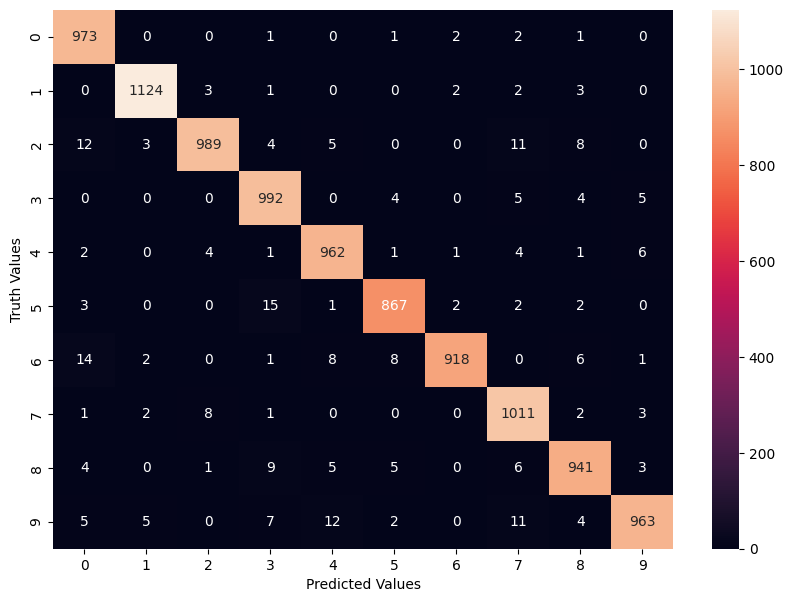

In [20]:
y_predict = model.predict(X_test_flat)
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Truth Values')

In [24]:
model.save('mnist_model.h5')

In [25]:
import joblib
import cv2

In [27]:
from flask import Flask, request, jsonify
import cv2

app = Flask(__name__)
model = tf.keras.models.load_model("mnist_model.h5")

def preprocess_image(image):
    image = cv2.resize(image, (28, 28))  # Resize to match MNIST input
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    image = image.astype("float32") / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

@app.route("/predict", methods=["POST"])
def predict():
    file = request.files["file"].read()
    npimg = np.frombuffer(file, np.uint8)
    img = cv2.imdecode(npimg, cv2.IMREAD_COLOR)
    processed_img = preprocess_image(img)

    prediction = model.predict(processed_img)
    digit = np.argmax(prediction)
    
    return jsonify({"digit": int(digit)})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: 1